In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

In [2]:
PATH_TWEETS_NLI_SCORES = 'data/additonal_features/tweets_keywords_relations_agg_by_day.csv'
PATH_PRICES_TIME_SERIES_PETR4 = 'TimeSerie/PETR4_time_series.csv'
PATH_PRICES_TIME_SERIES_VALE3 = 'TimeSerie/VALE3_time_series.csv'

df_nli_scores = pd.read_csv(PATH_TWEETS_NLI_SCORES)
df_prices_petr4 = pd.read_csv(PATH_PRICES_TIME_SERIES_PETR4)
df_prices_vale3 = pd.read_csv(PATH_PRICES_TIME_SERIES_VALE3)

df_prices_stocks = pd.concat([df_prices_petr4, df_prices_vale3], ignore_index=True)

In [3]:
df_nli_scores = df_nli_scores.rename({'datetime':'Date'}, axis='columns')

In [4]:
df_prices_tweets_stocks = pd.merge(df_nli_scores, df_prices_stocks, how='inner', on=['Date', 'stock'])

In [5]:
df_prices_tweets_stocks = df_prices_tweets_stocks.set_index('Date')

In [6]:
df_prices_tweets_stocks

,stock,valorização_mean,valorização_median,valorização_q1,valorização_q3,valorização_count,bom negócio_mean,bom negócio_median,bom negócio_q1,bom negócio_q3,...,EBIT - (R$),Resultado Financeiro - (R$),Impostos - (R$),Lucro Líquido - (R$),Lucro atribuído a Controladora,Lucro atribuído a Não Controladores,Dívida Bruta - (R$),Margem Bruta - (%),Margem Ebitda - (%),Margem Líquida - (%)
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01,PETR4,0.501828,0.501828,0.253213,0.750443,2,0.491784,0.491784,0.367215,0.616352,...,0.4746,-6.2823,0.1100,0.2166,0.2192,-0.3063,0.0116,0.0621,0.1461,0.0079
2022-06-02,PETR4,0.501828,0.501828,0.253213,0.750443,2,0.491784,0.491784,0.367215,0.616352,...,0.4746,-6.2823,0.1100,0.2166,0.2192,-0.3063,0.0116,0.0621,0.1461,0.0079
2022-06-03,PETR4,0.501828,0.501828,0.253213,0.750443,2,0.491784,0.491784,0.367215,0.616352,...,0.4746,-6.2823,0.1100,0.2166,0.2192,-0.3063,0.0116,0.0621,0.1461,0.0079
2022-06-06,PETR4,0.501828,0.501828,0.253213,0.750443,2,0.491784,0.491784,0.367215,0.616352,...,0.4746,-6.2823,0.1100,0.2166,0.2192,-0.3063,0.0116,0.0621,0.1461,0.0079
2022-06-07,PETR4,0.501828,0.501828,0.253213,0.750443,2,0.491784,0.491784,0.367215,0.616352,...,0.4746,-6.2823,0.1100,0.2166,0.2192,-0.3063,0.0116,0.0621,0.1461,0.0079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,VALE3,0.572810,0.483266,0.267237,0.975193,10,0.666688,0.678658,0.616157,0.748986,...,-0.3603,0.4948,-0.3633,-0.3115,-0.3080,-0.6583,0.0877,-0.2256,0.0382,0.0602
2024-05-27,VALE3,0.588541,0.748972,0.411575,0.812859,5,0.553513,0.663868,0.639569,0.689314,...,-0.3603,0.4948,-0.3633,-0.3115,-0.3080,-0.6583,0.0877,-0.2256,0.0382,0.0602
2024-05-28,VALE3,0.702186,0.724803,0.562714,0.864276,4,0.737152,0.702927,0.636298,0.803780,...,-0.3603,0.4948,-0.3633,-0.3115,-0.3080,-0.6583,0.0877,-0.2256,0.0382,0.0602


In [ ]:
df_prices

In [11]:
df_prices.columns

Index(['Date', 'Open PETR4.SA', 'High PETR4.SA', 'Low PETR4.SA',
       'Close PETR4.SA', 'Adj Close PETR4.SA', 'Volume PETR4.SA',
       'Open VALE3.SA', 'High VALE3.SA', 'Low VALE3.SA', 'Close VALE3.SA',
       'Adj Close VALE3.SA', 'Volume VALE3.SA', 'Receita Líquida - (R$)',
       'Custos - (R$)', 'Lucro Bruto - (R$)',
       'Despesas/Receitas Operacionais - (R$)', 'EBITDA - (R$)', 'EBIT - (R$)',
       'Resultado Financeiro - (R$)', 'Impostos - (R$)',
       'Lucro Líquido - (R$)', 'Lucro atribuído a Controladora',
       'Lucro atribuído a Não Controladores', 'Dívida Bruta - (R$)',
       'Margem Bruta - (%)', 'Margem Ebitda - (%)', 'Margem Líquida - (%)'],
      dtype='object')

# Petr4

In [ ]:
df_petr4 = df.query('stock == "PETR4"')

In [ ]:
df_petr4

In [ ]:
df_petr4['datetime'] = df_petr4['datetime'].astype('datetime64[ns]')

In [ ]:
stock_petr['datetime'] = pd.to_datetime(stock_petr['DATA'])
stock_petr

In [ ]:
petr4 = pd.merge(stock_petr, df_petr4, how="inner", on="datetime")
petr4

In [ ]:
petr4_final = petr4.drop(columns=['DATA', 'ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO','VOLUME', 'stock'])
cols = list(petr4_final)
cols.insert(0, cols.pop(cols.index('datetime')))
petr4_final = petr4_final.loc[:, cols]

## DataFrame Final

In [ ]:
petr4_final

# VALE3

In [ ]:
df_vale3 = df.query('stock == "VALE3"')
df_vale3

In [ ]:
stock_vale

In [ ]:
df_vale3['datetime'] = df_vale3['datetime'].astype('datetime64[ns]')

In [ ]:
stock_vale['datetime'] = pd.to_datetime(stock_vale['DATA'])
stock_vale

In [ ]:
vale3 = pd.merge(stock_vale, df_vale3, how="inner", on="datetime")
vale3

In [ ]:
vale3_final = vale3.drop(columns=['DATA', 'ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO','VOLUME', 'stock'])
cols = list(vale3_final)
cols.insert(0, cols.pop(cols.index('datetime')))
vale3_final = vale3_final.loc[:, cols]

## DataFrame Final

In [ ]:
vale3_final



# Correlações:

### PETR4

In [ ]:
df = petr4_final.corr()
df.head()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### PETR4 Simplificado

In [ ]:
extra = ['datetime',
 'valorização_median',
 'valorização_q1',
 'valorização_q3',
 'valorização_count',
 'bom negócio_median',
 'bom negócio_q1',
 'bom negócio_q3',
 'bom negócio_count',
 'lucro_median',
 'lucro_q1',
 'lucro_q3',
 'lucro_count',
 'neutro_median',
 'neutro_q1',
 'neutro_q3',
 'neutro_count',
 'desvalorização_median',
 'desvalorização_q1',
 'desvalorização_q3',
 'desvalorização_count',
 'mau negócio_median',
 'mau negócio_q1',
 'mau negócio_q3',
 'mau negócio_count',
 'prejuízo_median',
 'prejuízo_q1',
 'prejuízo_q3',
 'prejuízo_count',
 'governo_median',
 'governo_q1',
 'governo_q3',
 'governo_count',
]

df = petr4_final.drop(columns=extra).corr()
df

,VARIAÇÃO,valorização_mean,bom negócio_mean,lucro_mean,neutro_mean,desvalorização_mean,mau negócio_mean,prejuízo_mean,governo_mean,has_tweets
VARIAÇÃO,1.000000,0.070452,0.085335,0.037597,0.007883,-0.097392,-0.123043,-0.069841,-0.028327,0.059581
valorização_mean,0.070452,1.000000,0.470584,0.396183,-0.186634,-0.184400,-0.316671,-0.011874,-0.105625,0.048368
bom negócio_mean,0.085335,0.470584,1.000000,0.271063,-0.246599,-0.380096,-0.726825,-0.510241,-0.179750,-0.034477
lucro_mean,0.037597,0.396183,0.271063,1.000000,-0.098465,0.206058,-0.131493,0.028881,0.046932,0.027728
neutro_mean,0.007883,-0.186634,-0.246599,-0.098465,1.000000,0.096552,0.223437,0.113395,-0.043310,0.102172
desvalorização_mean,-0.097392,-0.184400,-0.380096,0.206058,0.096552,1.000000,0.462268,0.538589,0.275998,-0.014780
mau negócio_mean,-0.123043,-0.316671,-0.726825,-0.131493,0.223437,0.462268,1.000000,0.581087,0.233367,0.109251
prejuízo_mean,-0.069841,-0.011874,-0.510241,0.028881,0.113395,0.538589,0.581087,1.000000,0.204923,-0.029059
governo_mean,-0.028327,-0.105625,-0.179750,0.046932,-0.043310,0.275998,0.233367,0.204923,1.000000,-0.105267
has_tweets,0.059581,0.048368,-0.034477,0.027728,0.102172,-0.014780,0.109251,-0.029059,-0.105267,1.000000


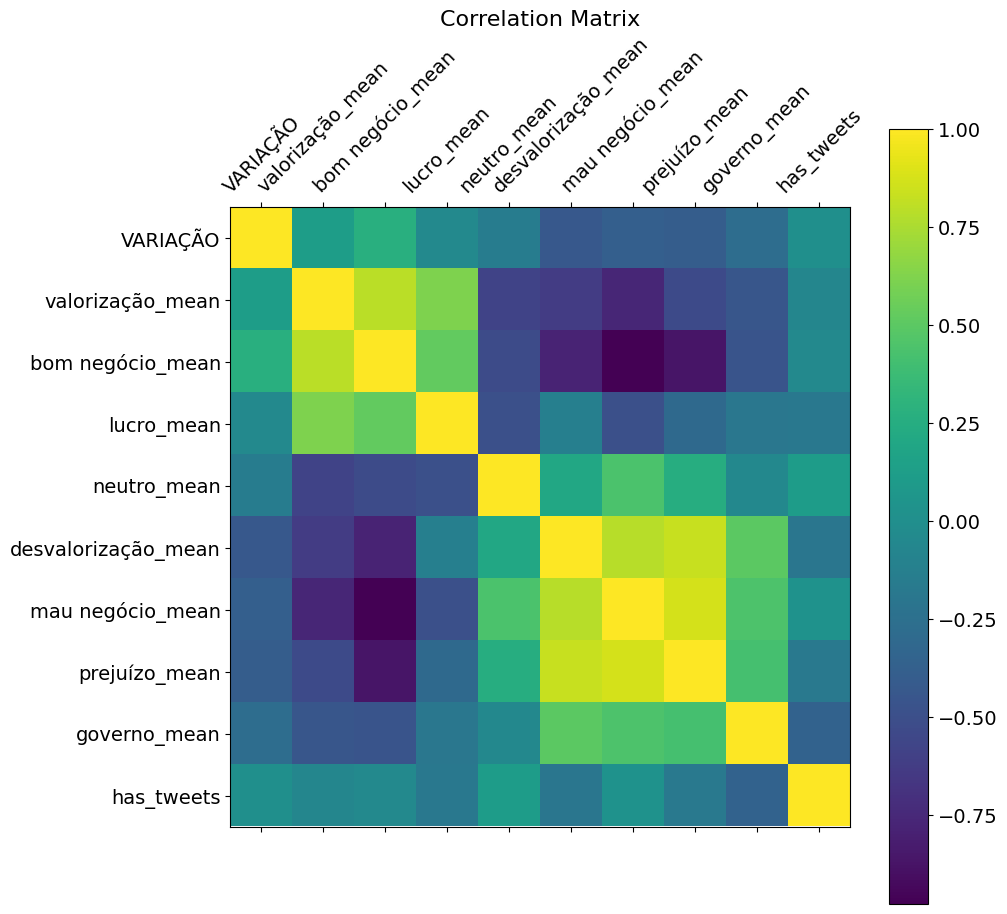

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### VALE3

In [ ]:
df = vale3_final.corr()
df.head()

,datetime,VARIAÇÃO,valorização_mean,valorização_median,valorização_q1,valorização_q3,valorização_count,bom negócio_mean,bom negócio_median,bom negócio_q1,...,prejuízo_median,prejuízo_q1,prejuízo_q3,prejuízo_count,governo_mean,governo_median,governo_q1,governo_q3,governo_count,has_tweets
datetime,1.000000,0.005828,-0.103363,-0.083272,-0.106735,-0.071231,0.047401,0.022191,0.045128,0.027084,...,0.057316,0.037910,0.062657,0.047401,0.167607,0.189651,0.094609,0.216579,0.047401,-0.106422
VARIAÇÃO,0.005828,1.000000,0.086110,0.089750,0.106481,0.066003,0.051914,0.131218,0.145325,0.116166,...,-0.097071,-0.076609,-0.087595,0.051914,0.057411,0.064708,0.027023,0.076398,0.051914,0.040535
valorização_mean,-0.103363,0.086110,1.000000,0.914772,0.928885,0.803990,-0.114689,0.337729,0.324424,0.363134,...,0.014449,0.099296,-0.031194,-0.114689,0.251508,0.252411,0.304190,0.149097,-0.114689,-0.083563
valorização_median,-0.083272,0.089750,0.914772,1.000000,0.834337,0.868361,0.062688,0.304504,0.313453,0.261247,...,-0.010459,-0.003220,0.036407,0.062688,0.220704,0.223886,0.189949,0.186174,0.062688,-0.027156
valorização_q1,-0.106735,0.106481,0.928885,0.834337,1.000000,0.597996,-0.212630,0.307355,0.297005,0.377353,...,0.000736,0.142501,-0.080646,-0.212630,0.192226,0.207369,0.318466,0.051784,-0.212630,-0.079387


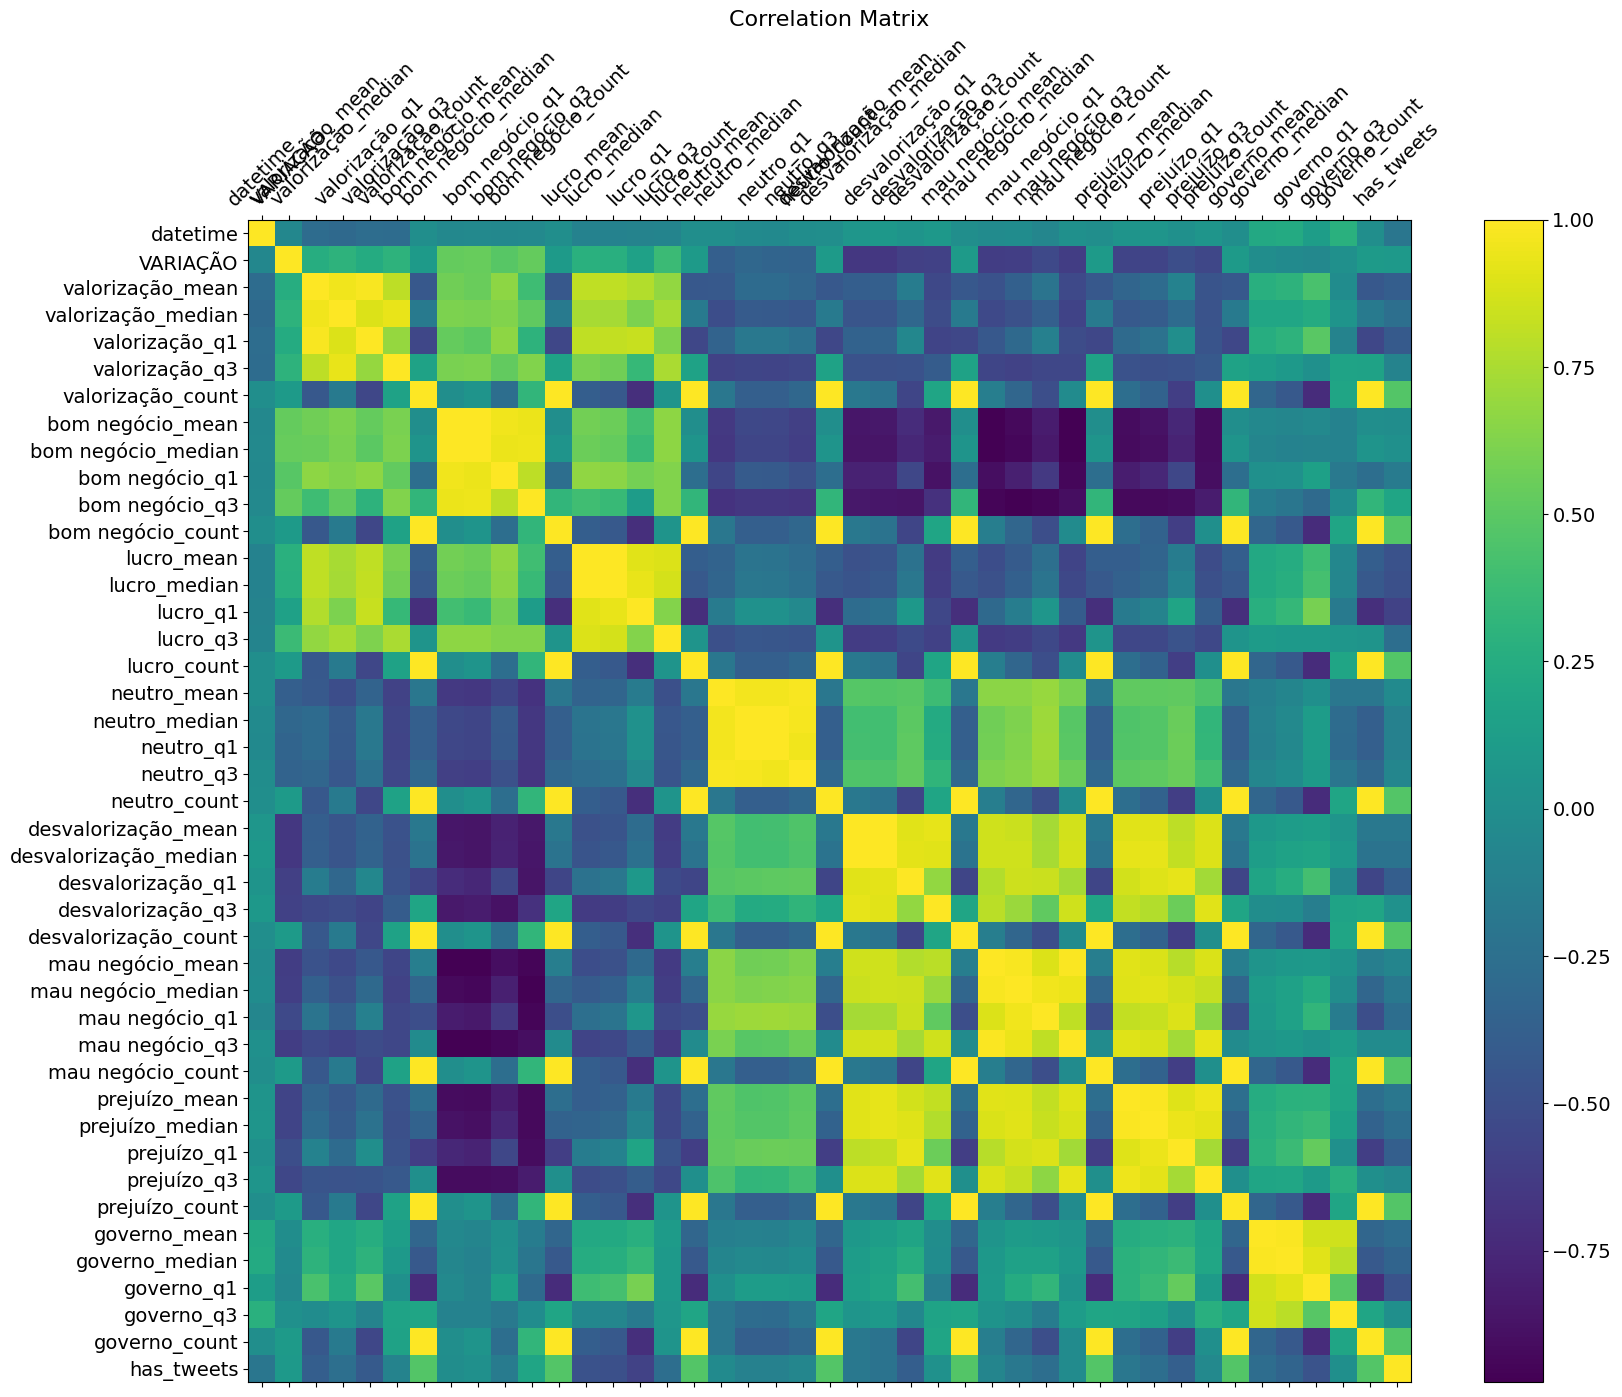

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### VALE3 Simplificado

In [ ]:
extra = ['datetime',
 'valorização_median',
 'valorização_q1',
 'valorização_q3',
 'valorização_count',
 'bom negócio_median',
 'bom negócio_q1',
 'bom negócio_q3',
 'bom negócio_count',
 'lucro_median',
 'lucro_q1',
 'lucro_q3',
 'lucro_count',
 'neutro_median',
 'neutro_q1',
 'neutro_q3',
 'neutro_count',
 'desvalorização_median',
 'desvalorização_q1',
 'desvalorização_q3',
 'desvalorização_count',
 'mau negócio_median',
 'mau negócio_q1',
 'mau negócio_q3',
 'mau negócio_count',
 'prejuízo_median',
 'prejuízo_q1',
 'prejuízo_q3',
 'prejuízo_count',
 'governo_median',
 'governo_q1',
 'governo_q3',
 'governo_count',
]

df = petr4_final.drop(columns=extra).corr()
df

,VARIAÇÃO,valorização_mean,bom negócio_mean,lucro_mean,neutro_mean,desvalorização_mean,mau negócio_mean,prejuízo_mean,governo_mean,has_tweets
VARIAÇÃO,1.000000,0.070452,0.085335,0.037597,0.007883,-0.097392,-0.123043,-0.069841,-0.028327,0.059581
valorização_mean,0.070452,1.000000,0.470584,0.396183,-0.186634,-0.184400,-0.316671,-0.011874,-0.105625,0.048368
bom negócio_mean,0.085335,0.470584,1.000000,0.271063,-0.246599,-0.380096,-0.726825,-0.510241,-0.179750,-0.034477
lucro_mean,0.037597,0.396183,0.271063,1.000000,-0.098465,0.206058,-0.131493,0.028881,0.046932,0.027728
neutro_mean,0.007883,-0.186634,-0.246599,-0.098465,1.000000,0.096552,0.223437,0.113395,-0.043310,0.102172
desvalorização_mean,-0.097392,-0.184400,-0.380096,0.206058,0.096552,1.000000,0.462268,0.538589,0.275998,-0.014780
mau negócio_mean,-0.123043,-0.316671,-0.726825,-0.131493,0.223437,0.462268,1.000000,0.581087,0.233367,0.109251
prejuízo_mean,-0.069841,-0.011874,-0.510241,0.028881,0.113395,0.538589,0.581087,1.000000,0.204923,-0.029059
governo_mean,-0.028327,-0.105625,-0.179750,0.046932,-0.043310,0.275998,0.233367,0.204923,1.000000,-0.105267
has_tweets,0.059581,0.048368,-0.034477,0.027728,0.102172,-0.014780,0.109251,-0.029059,-0.105267,1.000000


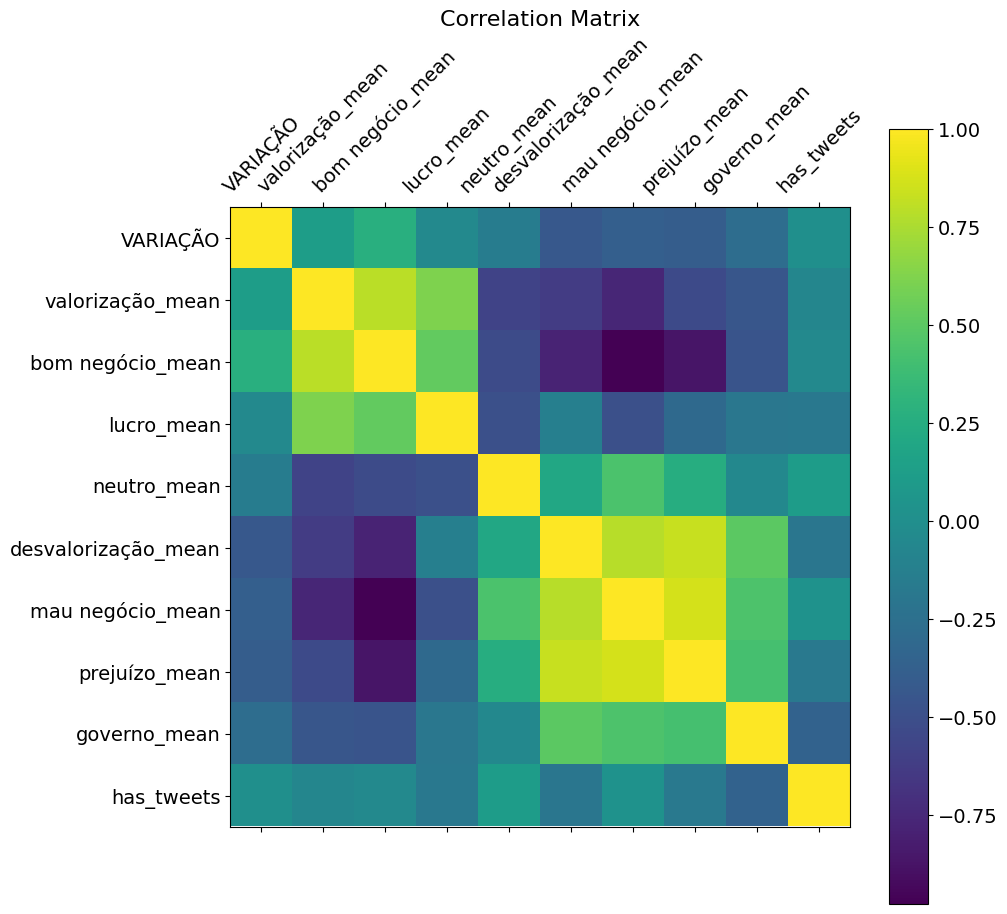

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);